In [2]:
import json
from ler import LeR
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [59]:
# getting data from json
# all
with open("../unlensed_params_BBH_1M.json") as f:
    unlensed_params = json.load(f)
with open("../lensed_params_BBH_1M.json") as f:
    lensed_params = json.load(f)
# detectable
with open("../unlensed_params_detectable_BBH_1M.json") as f:
    unlensed_params_detectable = json.load(f)
with open("../lensed_params_detectable_BBH_1M.json") as f:
    lensed_params_detectable = json.load(f)

### 4 image case only

In [60]:
# (1,2), (1,3), (1,4), (2,3), (2,4), (3,4)
# KDE plot Detectable+Undetectable for redshift distribution
# all
kde_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params['zs']).reshape(-1,1))
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zs']).reshape(-1,1))
kde_lenses = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zl']).reshape(-1,1))
# detectable
kde_unlensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params_detectable['zs']).reshape(-1,1))
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zs']).reshape(-1,1))
kde_lenses_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zl']).reshape(-1,1))

In [61]:
# select only rows without nan values
time_delays = np.array(lensed_params['time_delays'])
# index of rows without nan values in the element
idx = ~np.isnan(time_delays)
# sum across the rows
idx2 = np.sum(idx, axis=1)
# select only rows with 4 non-nan values
idx3 = np.argwhere(idx2==4)[:,0]

time_delays = time_delays[idx3] / (60 * 60 * 24)  # in days

In [62]:
len(time_delays)

122939

In [63]:
# number of 4 image events
len(time_delays)/1e6*100

12.2939

In [64]:
# (1,2), (1,3), (1,4), (2,3), (2,4), (3,4)
dt12 = np.log10(np.abs(time_delays[:,0] - time_delays[:,1]))
dt13 = np.log10(np.abs(time_delays[:,0] - time_delays[:,2]))
dt14 = np.log10(np.abs(time_delays[:,0] - time_delays[:,3]))
dt23 = np.log10(np.abs(time_delays[:,1] - time_delays[:,2]))
dt24 = np.log10(np.abs(time_delays[:,1] - time_delays[:,3]))
dt34 = np.log10(np.abs(time_delays[:,2] - time_delays[:,3]))
# if inf, replace with 0
dt12 = np.where(np.isinf(dt12), 0, dt12)
dt13 = np.where(np.isinf(dt13), 0, dt13)
dt14 = np.where(np.isinf(dt14), 0, dt14)
dt23 = np.where(np.isinf(dt23), 0, dt23)
dt24 = np.where(np.isinf(dt24), 0, dt24)
dt34 = np.where(np.isinf(dt34), 0, dt34)


In [65]:
# KDE plot for time delay distribution
kde_dt12 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(dt12).reshape(-1,1))
kde_dt13 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(dt13).reshape(-1,1))
kde_dt14 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(dt14).reshape(-1,1))
kde_dt23 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(dt23).reshape(-1,1))
kde_dt24 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(dt24).reshape(-1,1))
kde_dt34 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(dt34).reshape(-1,1))

In [1]:
# plot histogram of time delays
# plot
plt.figure(figsize=(6,4))
# all
plt.hist(dt12, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{12}$', histtype='step', color='C0')
plt.hist(dt13, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{13}$', histtype='step', color='C1')
plt.hist(dt14, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{14}$', histtype='step', color='C2')
plt.hist(dt23, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{23}$', histtype='step', color='C3')
plt.hist(dt24, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{24}$', histtype='step', color='C4')
plt.hist(dt34, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{34}$', histtype='step', color='C5')
plt.xlabel(r'$\log_{10}(\Delta t)$ [days]')
plt.ylabel('Probability Density')
#show legend
plt.legend() 
# save figure
plt.savefig('timedelays.png')
plt.show()

NameError: name 'plt' is not defined

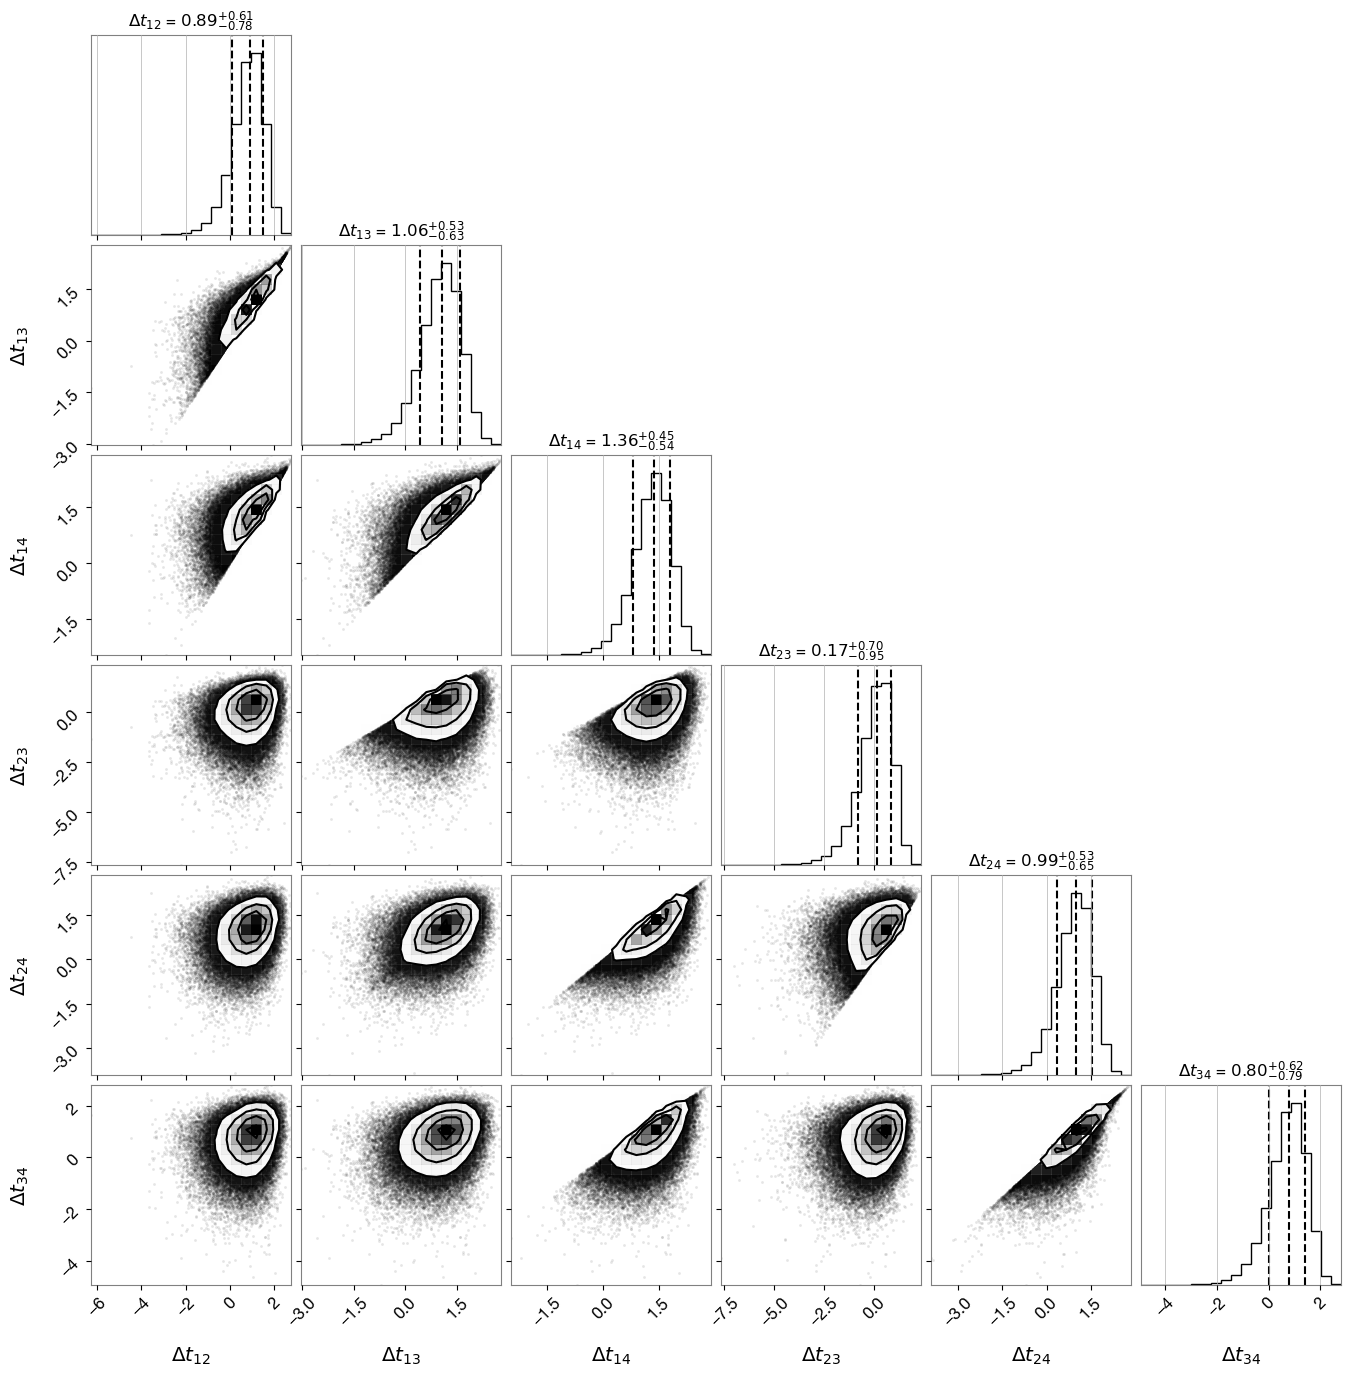

In [68]:
# corner plot
import corner
# all
samples = np.vstack([dt12, dt13, dt14, dt23, dt24, dt34]).T
fig = corner.corner(samples, labels=[r'$\Delta t_{12}$', r'$\Delta t_{13}$', r'$\Delta t_{14}$', r'$\Delta t_{23}$', r'$\Delta t_{24}$', r'$\Delta t_{34}$'], quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})
# save
fig.savefig('corner_plot_timedelays.png', dpi=300)
plt.show()

## three images within a week

In [110]:
# select only rows without nan values
time_delays = np.array(lensed_params['time_delays'])
# index of rows without nan values in the element
idx = ~np.isnan(time_delays)
# sum across the rows
idx2 = np.sum(idx, axis=1)
# select only rows with 3 non-nan values
idx3 = np.argwhere(idx2>=3)[:,0]

time_delays = time_delays[idx3] / (60 * 60 * 24)  # in days

In [111]:
len(time_delays)

144375

In [112]:
144375/1e6*100

14.4375

In [113]:
# select only three images within a week
idx = time_delays<7
idx2 = np.sum(idx, axis=1)
idx3 = np.argwhere(idx2>=3)[:,0]
dt_3events_withinAweek = time_delays[idx3]


In [114]:
# out of all 3 image events, how many have 3 images within a week?
len(dt_3events_withinAweek)/len(time_delays)*100

39.10787878787879

In [115]:
# out of all events, how many have 3 images within a week?
len(dt_3events_withinAweek)/1e6*100

5.646199999999999

In [181]:
# all within 7 days
dt_3events_withinAweek[:,2]

array([0.93635523, 6.55434151, 0.47339959, ..., 2.21392259,
       0.66521432, 3.62598718])

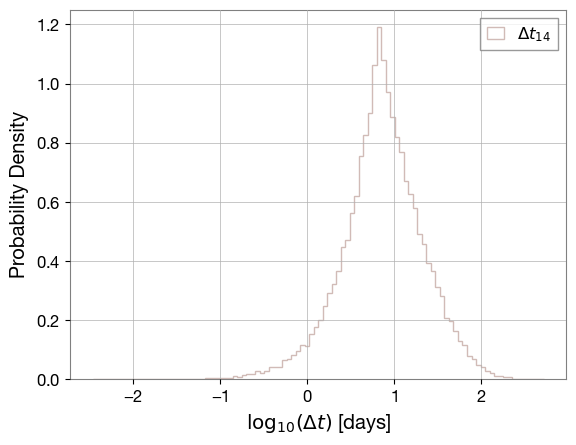

In [182]:
# plot hist of time_delays[:,3]
plt.hist(np.log10(dt_3events_withinAweek[:,3]-dt_3events_withinAweek[:,0]), bins=100, density=True, alpha=0.4, label=r'$\Delta t_{14}$', histtype='step', color='C5')
plt.xlabel(r'$\log_{10}(\Delta t)$ [days]')
plt.ylabel('Probability Density')
#show legend
plt.legend()
plt.show()

### sky positions

In [117]:
### looking at the sky positions
ra = np.array(lensed_params['ra'])[idx3]
dec = np.array(lensed_params['dec'])[idx3]

In [118]:
# within certain values of ra and dec
# ra near 1.5, plus minus 0.75
idx = (ra>=(1.5-0.75)) & (ra<=(1.5+0.75))
# dec between -0.6 to 0.0
idx2 = (dec>=-0.6) & (dec<=0.0)
# combine the two
idx3 = idx & idx2
# select ra and dec
ra_within = ra[idx3]
dec_within = dec[idx3]

In [119]:
ra_within

array([1.72975856, 1.40814858, 1.54500006, ..., 2.02519797,
       1.28598869, 2.07634977])

In [120]:
# consider 4 image conditions
len(ra_within)/1e6*100

0.3831

In [112]:
# consider 3 image conditions
len(ra_within)/144375*100

46.44225108225108

In [113]:
# consider any image conditions
len(ra_within)/1e6*100

6.7051

In [31]:
# chirp mass    within 60 to 90
m1 = np.array(lensed_params['mass_1'])
m2 = np.array(lensed_params['mass_2'])
# chirp mass
mchirp = (m1*m2)**(3/5) / (m1+m2)**(1/5)

idx4 = (mchirp>=60) & (mchirp<=90)
idx5 = idx3 & idx4
np.sum(idx5)

8727

In [ ]:
8727

## unlensed events

In [7]:
with open("../unlensed_params_BBH_1M.json") as f:
    unlensed_params = json.load(f)

### 2 event case

In [82]:
# time delays within 7 days
# get geocent time
time = np.array(unlensed_params['geocent_time'])/ (60 * 60 * 24)  # in days
ra = np.array(unlensed_params['ra'])
dec = np.array(unlensed_params['dec'])
# chirp mass
m1 = np.array(unlensed_params['mass_1'])
m2 = np.array(unlensed_params['mass_2'])
# chirp mass
mchirp = (m1*m2)**(3/5) / (m1+m2)**(1/5)

# form this randomly pick two events and calculate the absolute time difference
# do this 1000 times
# if the time difference is less than 7 days, then count it
# record the index of the two events
num = 100000
time_diff = np.zeros(num)
size  = len(time)
first_idx_time = np.zeros(num)
first_idx_ra = np.zeros(num)
first_idx_dec = np.zeros(num)
first_idx_mchirp = np.zeros(num)
second_idx_time = np.zeros(num)
second_idx_ra = np.zeros(num)
second_idx_dec = np.zeros(num)
second_idx_mchirp = np.zeros(num)

for i in range(num):
    # randomly pick two events
    idx = np.random.randint(0, size, 2)
    # calculate the time difference
    time_diff[i] = np.abs(time[idx[0]] - time[idx[1]])
    # record the index
    first_idx_time[i] = idx[0]
    second_idx_time[i] = idx[1]
    
idx0 = time_diff<7

In [81]:
np.sum(idx0)

3749

In [77]:
np.sum(idx0)/num*100

3.7920000000000003

In [85]:
first_idx_time[idx0]

array([261945., 719673., 688150., ..., 457173., 208918.,
       982653.])

In [98]:
first_idx_time[idx0].astype(int)

array([261945, 719673, 688150, ..., 457173, 208918, 982653])

In [ ]:
idx0

In [107]:
### looking at the sky positions
ra_unlensed = np.array(unlensed_params['ra'])
dec_unlensed = np.array(unlensed_params['dec'])
# idx0 from time delays constraint
ra = np.array([ra_unlensed[first_idx_time[idx0].astype(int)], ra_unlensed[second_idx_time[idx0].astype(int)]]).T
dec = np.array([dec_unlensed[first_idx_time[idx0].astype(int)], dec_unlensed[second_idx_time[idx0].astype(int)]]).T

# ra near 1.5, plus minus 0.75
idx = (ra>=(1.5-0.75)) & (ra<=(1.5+0.75))
# sum across the rows
idx = np.sum(idx, axis=1)
# dec between -0.6 to 0.0
idx2 = (dec>=-0.6) & (dec<=0.0)
# sum across the rows
idx2 = np.sum(idx2, axis=1)
# combine the two
idx3 = idx & idx2
# select ra and dec
ra_within = ra[idx3]
dec_within = dec[idx3]


In [109]:
len(ra_within)

3836

In [104]:
len(ra_within)/num*100

0.511

In [106]:
idx3

array([[False, False],
       [False, False],
       [False,  True],
       ...,
       [ True, False],
       [False, False],
       [False, False]])

In [105]:
first_idx_time[idx0][idx3]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# chirp mass    within 60 to 90
m1 = np.array(unlensed_params['mass_1'])[first_idx_time[idx0][]
m2 = np.array(unlensed_params['mass_2'])
# chirp mass
mchirp = (m1*m2)**(3/5) / (m1+m2)**(1/5)




In [ ]:
### looking at the sky positions
ra_unlensed = np.array(unlensed_params['ra'])
dec_unlensed = np.array(unlensed_params['dec'])

# within certain values of ra and dec
# ra near 1.5, plus minus 0.75
idx = (ra_unlensed>=(1.5-0.75)) & (ra_unlensed<=(1.5+0.75))
# dec between -0.6 to 0.0
idx2 = (dec_unlensed>=-0.6) & (dec_unlensed<=0.0)
# combine the two
idx3 = idx & idx2
# select ra and dec
ra_within_unlensed = ra_unlensed[idx3]
dec_within_unlensed = dec_unlensed[idx3]

In [ ]:
# within certain values of ra and dec
# ra near 1.5, plus minus 0.75
idx = (ra_unlensed>=(1.5-0.75)) & (ra_unlensed<=(1.5+0.75))
# dec between -0.6 to 0.0
idx2 = (dec_unlensed>=-0.6) & (dec_unlensed<=0.0)
# combine the two
idx3 = idx & idx2
# select ra and dec
ra_within_unlensed = ra_unlensed[idx3]
dec_within_unlensed = dec_unlensed[idx3]

In [39]:
# comparing with unlensed events
### looking at the sky positions
ra_unlensed = np.array(unlensed_params['ra'])
dec_unlensed = np.array(unlensed_params['dec'])

# within certain values of ra and dec
# ra near 1.5, plus minus 0.75
idx = (ra_unlensed>=(1.5-0.75)) & (ra_unlensed<=(1.5+0.75))
# dec between -0.6 to 0.0
idx2 = (dec_unlensed>=-0.6) & (dec_unlensed<=0.0)
# combine the two
idx3 = idx & idx2
# select ra and dec
ra_within_unlensed = ra_unlensed[idx3]
dec_within_unlensed = dec_unlensed[idx3]

In [40]:
len(ra_within_unlensed)/1e6*100

6.7147

In [41]:
unlensed_params.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1'])

In [42]:
# consider selected events with idx3 only
# how many of the pairs are with time delay less than 7 days?
tt = np.array(unlensed_params['geocent_time'])
tt = tt[idx3]
# check if the next event is within 7 days



In [43]:
# chirp mass within 60 to 90
m1 = np.array(unlensed_params['mass_1'])
m2 = np.array(unlensed_params['mass_2'])
# chirp mass
mchirp = (m1*m2)**(3/5) / (m1+m2)**(1/5)

idx4 = (mchirp>=60) & (mchirp<=90)
idx5 = idx3 & idx4
np.sum(idx5)

7392

In [36]:
7392/1e6*100

0.7392

In [212]:
len(idx5)

1000000

In [17]:
# geocent time distribution
tt = np.array(unlensed_params['geocent_time']) / (60 * 60 * 24)  # in days
# wrt to the first event
tt = tt - np.min(tt)
# in log10 scale
tt = np.log10(tt)
# replace inf with 0
tt = np.where(np.isinf(tt), 0, tt)

Text(0, 0.5, 'Probability Density')

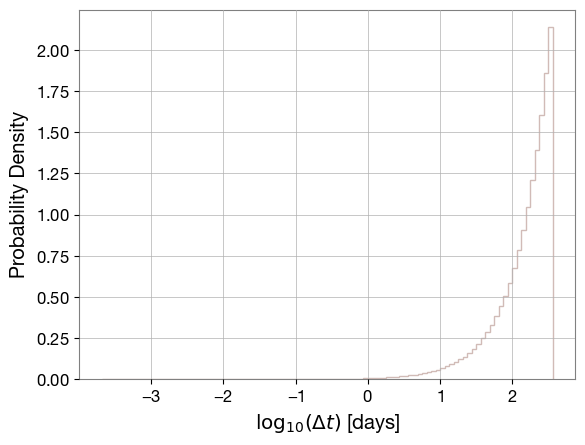

In [19]:
# plot histogram of time delays
# all
plt.hist(tt, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{14}$', histtype='step', color='C5')
plt.xlabel(r'$\log_{10}(\Delta t)$ [days]')
plt.ylabel('Probability Density')
#show legend

In [51]:
# geocent time distribution
tt = np.array(unlensed_params['geocent_time']) # in seconds
# constrain with sky location and mass distribution
tt = tt[idx5]

In [56]:
import random
len_ = len(tt)
tt_ = []
size = 200
while len(tt_) < size:
    idx1_, idx2_ = random.sample(range(len_), 2)
    tt_.append(tt[idx2_] - tt[idx1_])

dt = np.abs(np.array(tt_)) / (60 * 60 * 24)  # in days

In [57]:
dt

array([102.17478009,  20.82349537,  67.27751157,  36.40336806,
        14.90377315, 159.63523148,  28.81403935, 250.59137731,
       241.8908912 , 247.75248843,  22.65359954, 265.14541667,
       249.97309028,  13.65506944,  95.78334491,  18.49571759,
        16.57164352, 133.17858796, 153.4884838 ,  17.67510417,
        67.39237269,  84.75755787, 177.23787037, 190.70671296,
        12.51957176, 314.76020833, 255.30510417,  88.00344907,
        79.99671296,  76.53427083,  25.17111111,  88.79756944,
        50.28384259,  41.9368287 ,  11.76231481,  52.0769213 ,
       188.86283565,  58.03487269,  85.26233796,  93.37025463,
       318.08315972, 200.95451389,  63.68950231, 111.29003472,
       239.2578588 , 174.87912037, 176.99699074, 104.04114583,
        78.28303241,  59.70008102,  83.07255787,  98.14851852,
       160.79109954, 155.86784722, 192.03020833, 244.26274306,
         8.68983796,  80.69237269,  67.83717593, 104.73706019,
       220.40384259, 105.63762731, 158.85600694, 213.12

In [215]:
tt

array([0.00000000e+00, 2.50347222e-02, 1.47997685e-01, ...,
       3.64724329e+02, 3.64846736e+02, 3.64851690e+02])